In [1]:
"""

Java/HDFS logs

t1 INFO added user abc
t2 ERROR deleted user xyz

Elastic search

t1 | INFO | added user abc
t2 | ERROR | deleted user xyz

ML 

Events

event_id | event
e1 | added user <>
e2 | deleted user <>


Logs

0-5 mins - tw1
t1 | INFO | added user 1
t2 | ERROR | deleted user 2
t3 | INFO | added user 3
t4 | ERROR | deleted user 4
t5 | INFO | added user 5


6-10 mins
t6 | ERROR | deleted user 6
t7 | INFO | added user 7
t8 | ERROR | deleted user 8

11-15 mins
t9 | INFO | added user 9
t10 | ERROR | deleted user 0


Log_summary


time_window_id | count_info | count_error | count_e1 | count_e2
tw1 | 3 | 2 | 3 | 2
tw2 | 1 | 2 | 1 | 2
tw3 | 1 | 1 | 1 | 1

"""

'\n\nJava/HDFS logs\n\nt1 INFO added user abc\nt2 ERROR deleted user xyz\n\nElastic search\n\nt1 | INFO | added user abc\nt2 | ERROR | deleted user xyz\n\nML \n\nEvents\n\nevent_id | event\ne1 | added user <>\ne2 | deleted user <>\n\n\nLogs\n\n0-5 mins - tw1\nt1 | INFO | added user 1\nt2 | ERROR | deleted user 2\nt3 | INFO | added user 3\nt4 | ERROR | deleted user 4\nt5 | INFO | added user 5\n\n\n6-10 mins\nt6 | ERROR | deleted user 6\nt7 | INFO | added user 7\nt8 | ERROR | deleted user 8\n\n11-15 mins\nt9 | INFO | added user 9\nt10 | ERROR | deleted user 0\n\n\nLog_summary\n\n\ntime_window_id | count_info | count_error | count_e1 | count_e2\ntw1 | 3 | 2 | 3 | 2\ntw2 | 1 | 2 | 1 | 2\ntw3 | 1 | 1 | 1 | 1\n\n'

In [2]:
import pandas as pd
import os
import numpy as np
import re
from sklearn.utils import shuffle
from collections import OrderedDict
import sys
sys.path.append('../')
from log_parser import Drain

log_file_path = 'data/unstructured/HDFS/'
label_file_name = 'data/unstructured/HDFS/anomaly_label.csv'
unstructured_log_filename = 'HDFS_2k.log'
structured_log_file_path = 'data/structured/HDFS/'
structured_log_filename = 'HDFS_2k.log_structured.csv'


def parseLog(log_file_path, log_file_name, structured_log_file_path, log_type):
    if log_type == 'HDFS':
        log_format = '<Date> <Time> <Pid> <Level> <Component>: <Content>'

    # Regular expression list for optional preprocessing (default: [])
    regex      = [
        r'blk_(|-)[0-9]+' , # block id
        r'(/|)([0-9]+\.){3}[0-9]+(:[0-9]+|)(:|)', # IP
        r'(?<=[^A-Za-z0-9])(\-?\+?\d+)(?=[^A-Za-z0-9])|[0-9]+$', # Numbers
    ]
    st         = 0.5  # Similarity threshold
    depth      = 4  # Depth of all leaf nodes

    parser = Drain.LogParser(log_format, indir=log_file_path, outdir=structured_log_file_path,  depth=depth, st=st, rex=regex)
    parser.parse(log_file_name)

## parse the logs - convert unstructured to structured log
parseLog(log_file_path, unstructured_log_filename, structured_log_file_path, 'HDFS')
    

## read structured log 
print("Loading", structured_log_file_path+structured_log_filename)
structured_log = pd.read_csv(structured_log_file_path+structured_log_filename, engine='c', na_filter=False, memory_map=True)

structured_log

Parsing file: data/unstructured/HDFS/HDFS_2k.log
Processed 50.0% of log lines.
Processed 100.0% of log lines.
Parsing done. [Time taken: 0:00:00.226926]
Loading data/structured/HDFS/HDFS_2k.log_structured.csv


,LineId,Date,Time,Pid,Level,Component,Content,EventId,EventTemplate,ParameterList
0,1,81109,203615,148,INFO,dfs.DataNode$PacketResponder,PacketResponder 1 for block blk_38865049064139...,dc2c74b7,PacketResponder <*> for block <*> terminating,"['1', 'blk_38865049064139660']"
1,2,81109,203807,222,INFO,dfs.DataNode$PacketResponder,PacketResponder 0 for block blk_-6952295868487...,dc2c74b7,PacketResponder <*> for block <*> terminating,"['0', 'blk_-6952295868487656571']"
2,3,81109,204005,35,INFO,dfs.FSNamesystem,BLOCK* NameSystem.addStoredBlock: blockMap upd...,5d5de21c,BLOCK* NameSystem.addStoredBlock: blockMap upd...,"['10.251.73.220:50010', 'blk_71283702376877284..."
3,4,81109,204015,308,INFO,dfs.DataNode$PacketResponder,PacketResponder 2 for block blk_82291938032499...,dc2c74b7,PacketResponder <*> for block <*> terminating,"['2', 'blk_8229193803249955061']"
4,5,81109,204106,329,INFO,dfs.DataNode$PacketResponder,PacketResponder 2 for block blk_-6670958622368...,dc2c74b7,PacketResponder <*> for block <*> terminating,"['2', 'blk_-6670958622368987959']"
...,...,...,...,...,...,...,...,...,...,...
1995,1996,81111,101621,24902,INFO,dfs.DataNode$DataXceiver,Receiving block blk_4198733391373026104 src: /...,09a53393,Receiving block <*> src: <*> dest: <*>,"['blk_4198733391373026104', '/10.251.106.10:46..."
1996,1997,81111,101735,26595,INFO,dfs.DataNode$PacketResponder,Received block blk_-5815145248455404269 of siz...,e3df2680,Received block <*> of size <*> from <*>,"['blk_-5815145248455404269', '67108864', '/10...."
1997,1998,81111,101804,26494,INFO,dfs.DataNode$DataXceiver,Receiving block blk_-295306975763175640 src: /...,09a53393,Receiving block <*> src: <*> dest: <*>,"['blk_-295306975763175640', '/10.250.9.207:532..."
1998,1999,81111,101954,26414,INFO,dfs.DataNode$PacketResponder,PacketResponder 0 for block blk_52257196770490...,dc2c74b7,PacketResponder <*> for block <*> terminating,"['0', 'blk_5225719677049010638']"


In [3]:
def fill_zeros(x):
    if len(str(x)) < 6:
        return str(x).zfill(6)
    else:
        return str(x)
    
structured_log['Date'] = structured_log['Date'].apply(fill_zeros)
structured_log['Time'] = structured_log['Time'].apply(fill_zeros)

structured_log.loc[:,'Date'] = pd.to_datetime(structured_log.Date.astype(str)+' '+structured_log.Time.astype(str), format="%y%m%d %H%M%S")
# structured_log.set_index("Date", inplace=True)

structured_log = structured_log.drop(columns=['Time'])

structured_log.head()

structured_log['EventTemplate'].nunique()

16

In [4]:
# TODO: Cleaning: Remove rows and colums with count 0 (no data present)


In [5]:
# Adding relevant columns to the dataframe
LOG_LEVELS = ['WARN', 'INFO', 'DEBUG', 'TRACE', 'ERROR', 'FATAL']
df_grouped = structured_log.groupby(pd.Grouper(key='Date', freq='5Min',closed='right',label='right')).agg(
    total_msgs=pd.NamedAgg(column="Content", aggfunc="count"),    
).reset_index()

for level in LOG_LEVELS:
    df_grouped[level + '_count'] = 0

for event_id in structured_log['EventId'].unique():
    df_grouped[event_id + '_count'] = 0

df_grouped.head()

,Date,total_msgs,WARN_count,INFO_count,DEBUG_count,TRACE_count,ERROR_count,FATAL_count,dc2c74b7_count,5d5de21c_count,...,dba996ef_count,626085d5_count,81cee340_count,d63ef163_count,40651754_count,04137b95_count,d6b7b743_count,98012f03_count,728076ac_count,415a1760_count
0,2008-11-09 20:40:00,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2008-11-09 20:45:00,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2008-11-09 20:50:00,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2008-11-09 20:55:00,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008-11-09 21:00:00,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Populating all the log level counts
df_grouped_logLevel = structured_log.groupby([pd.Grouper(key='Date', freq='5Min',closed='right',label='right'), 'Level']).agg(
    count=pd.NamedAgg(column="Level", aggfunc="count"),    
).reset_index()

for row in df_grouped_logLevel.itertuples():
    df_grouped.loc[df_grouped['Date'] == row.Date, row.Level + '_count'] = row.count

df_grouped.head()

,Date,total_msgs,WARN_count,INFO_count,DEBUG_count,TRACE_count,ERROR_count,FATAL_count,dc2c74b7_count,5d5de21c_count,...,dba996ef_count,626085d5_count,81cee340_count,d63ef163_count,40651754_count,04137b95_count,d6b7b743_count,98012f03_count,728076ac_count,415a1760_count
0,2008-11-09 20:40:00,2,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2008-11-09 20:45:00,6,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2008-11-09 20:50:00,7,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2008-11-09 20:55:00,6,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008-11-09 21:00:00,8,0,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Populating all the event id counts
df_grouped_eventId = structured_log.groupby([pd.Grouper(key='Date', freq='5Min',closed='right',label='right'), 'EventId']).agg(
    count=pd.NamedAgg(column="EventId", aggfunc="count"),    
).reset_index()

for row in df_grouped_eventId.itertuples():
    df_grouped.loc[df_grouped['Date'] == row.Date, row.EventId + '_count'] = row.count

df_grouped

,Date,total_msgs,WARN_count,INFO_count,DEBUG_count,TRACE_count,ERROR_count,FATAL_count,dc2c74b7_count,5d5de21c_count,...,dba996ef_count,626085d5_count,81cee340_count,d63ef163_count,40651754_count,04137b95_count,d6b7b743_count,98012f03_count,728076ac_count,415a1760_count
0,2008-11-09 20:40:00,2,0,2,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
1,2008-11-09 20:45:00,6,0,6,0,0,0,0,2,4,...,0,0,0,0,0,0,0,0,0,0
2,2008-11-09 20:50:00,7,0,7,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,2008-11-09 20:55:00,6,0,6,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,2008-11-09 21:00:00,8,0,8,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,2008-11-11 10:05:00,8,0,8,0,0,0,0,2,3,...,1,0,0,0,0,0,0,0,0,0
450,2008-11-11 10:10:00,6,0,6,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
451,2008-11-11 10:15:00,15,0,15,0,0,0,0,6,3,...,0,0,0,0,0,0,0,0,0,0
452,2008-11-11 10:20:00,4,0,4,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Remove columns that are all zeroes


# Remove rows that are all zeroes


In [9]:
type(df_grouped.columns)
feature_cols = list(df_grouped.columns);
feature_cols.remove('Date')
feature_cols
data_new = df_grouped[feature_cols]


In [10]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

np_scaled = min_max_scaler.fit_transform(data_new)
data_new = pd.DataFrame(np_scaled, columns=feature_cols)

data_new

,total_msgs,WARN_count,INFO_count,DEBUG_count,TRACE_count,ERROR_count,FATAL_count,dc2c74b7_count,5d5de21c_count,e3df2680_count,...,dba996ef_count,626085d5_count,81cee340_count,d63ef163_count,40651754_count,04137b95_count,d6b7b743_count,98012f03_count,728076ac_count,415a1760_count
0,0.022472,0.0,0.022472,0.0,0.0,0.0,0.0,0.333333,0.000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.067416,0.0,0.067416,0.0,0.0,0.0,0.0,0.333333,0.500,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.078652,0.0,0.078652,0.0,0.0,0.0,0.0,0.166667,0.125,0.333333,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.067416,0.0,0.067416,0.0,0.0,0.0,0.0,0.166667,0.125,0.333333,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.089888,0.0,0.089888,0.0,0.0,0.0,0.0,0.000000,0.375,0.333333,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,0.089888,0.0,0.089888,0.0,0.0,0.0,0.0,0.333333,0.375,0.166667,...,0.022222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
450,0.067416,0.0,0.067416,0.0,0.0,0.0,0.0,0.166667,0.125,0.166667,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451,0.168539,0.0,0.168539,0.0,0.0,0.0,0.0,1.000000,0.375,0.500000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
452,0.044944,0.0,0.044944,0.0,0.0,0.0,0.0,0.166667,0.000,0.166667,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# bucket similar columns and reducedimension. then do the plotting

# import seaborn as sns

# sns.pairplot(df_grouped[feature_cols])

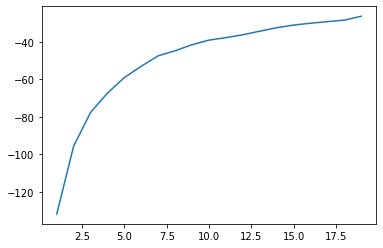

In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
RANDOM_STATE = 123

n_cluster = range(12, 14)
kmeans = [KMeans(n_clusters=i, random_state=RANDOM_STATE).fit(data_new) for i in n_cluster]
scores = [kmeans[i].score(data_new) for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.show()



In [13]:
cluster_model = kmeans[11]

df_grouped['cluster'] = cluster_model.predict(data_new)
df_grouped['cluster'].value_counts()



2     207
0      35
1      33
7      30
3      27
6      24
5      20
8      20
11     18
10     17
9      13
4      10
Name: cluster, dtype: int64

In [14]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, random_state=RANDOM_STATE)
tsne_results = tsne.fit_transform(data_new)



/home/sandesh/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/sandesh/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 454 samples in 0.001s...
[t-SNE] Computed neighbors for 454 samples in 0.025s...
[t-SNE] Computed conditional probabilities for sample 454 / 454
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.872086
[t-SNE] KL divergence after 300 iterations: 0.443496


In [15]:
df_grouped['tsne-2d-one'] = tsne_results[:,0]
df_grouped['tsne-2d-two'] = tsne_results[:,1]
df_grouped

,Date,total_msgs,WARN_count,INFO_count,DEBUG_count,TRACE_count,ERROR_count,FATAL_count,dc2c74b7_count,5d5de21c_count,...,d63ef163_count,40651754_count,04137b95_count,d6b7b743_count,98012f03_count,728076ac_count,415a1760_count,cluster,tsne-2d-one,tsne-2d-two
0,2008-11-09 20:40:00,2,0,2,0,0,0,0,2,0,...,0,0,0,0,0,0,0,2,-0.042953,-6.565957
1,2008-11-09 20:45:00,6,0,6,0,0,0,0,2,4,...,0,0,0,0,0,0,0,6,-1.444850,-7.060615
2,2008-11-09 20:50:00,7,0,7,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,-7.113407,-6.923002
3,2008-11-09 20:55:00,6,0,6,0,0,0,0,1,1,...,0,0,0,0,0,0,0,9,-3.370746,-8.648266
4,2008-11-09 21:00:00,8,0,8,0,0,0,0,0,3,...,0,0,0,0,0,0,0,5,-7.136110,4.073763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,2008-11-11 10:05:00,8,0,8,0,0,0,0,2,3,...,0,0,0,0,0,0,0,6,-2.204862,-7.077231
450,2008-11-11 10:10:00,6,0,6,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,-7.172623,-7.353198
451,2008-11-11 10:15:00,15,0,15,0,0,0,0,6,3,...,0,0,0,0,0,0,0,10,-5.097717,-11.352898
452,2008-11-11 10:20:00,4,0,4,0,0,0,0,1,0,...,0,0,0,0,0,0,0,7,-6.661719,-6.789657


In [19]:
import pandas as pd
import numpy as np
import datetime as dt
import random

import matplotlib.pyplot as plt
%matplotlib inline

# Set some parameters to get good visuals - style to ggplot and size to 15,10
plt.style.use('ggplot')
import matplotlib.style as style
style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn import preprocessing
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

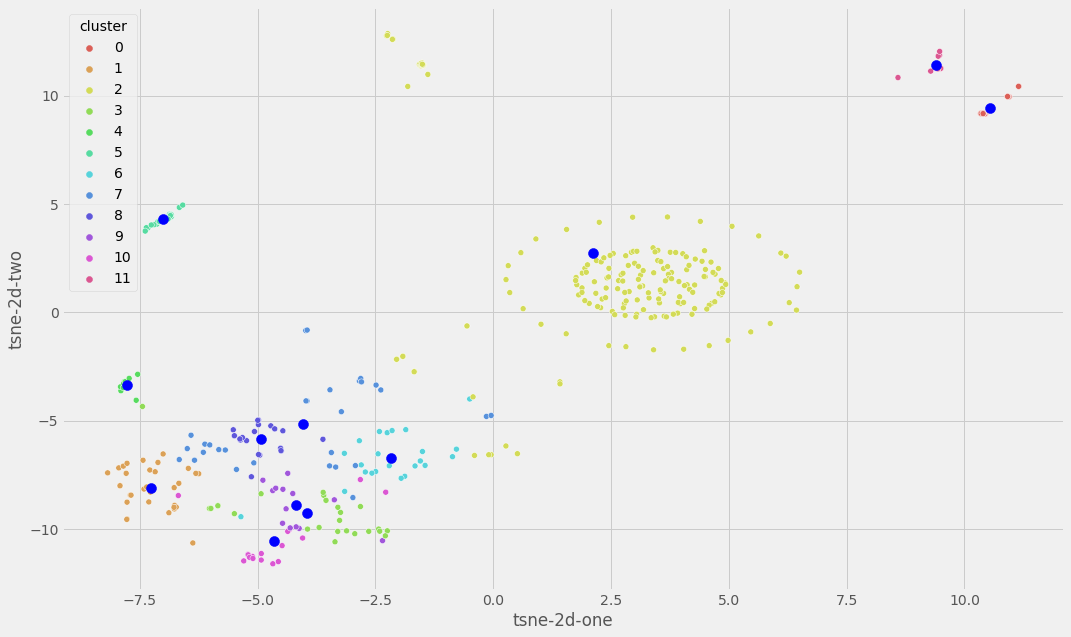

In [20]:
tsne_cluster = df_grouped.groupby('cluster').agg({'tsne-2d-one':'mean', 'tsne-2d-two':'mean'}).reset_index()


plt.figure(figsize=(16,10))

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="cluster",
    palette=sns.color_palette("hls", 12),
    data=df_grouped,
    legend="full",
    alpha=1
)

plt.scatter(x="tsne-2d-one", y="tsne-2d-two", data=tsne_cluster, s=100, c='b')

plt.show()

/tmp/ipykernel_20692/312542329.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  total_distance = pd.Series()
/tmp/ipykernel_20692/312542329.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  total_distance = pd.Series()


(array([  5.,  14.,  23.,  21.,  18., 192.,  16.,  49.,   9.,   4.,   5.,
          3.,   8.,   3.,   5.,   5.,   4.,   8.,   6.,   1.,   2.,   1.,
          0.,   5.,   2.,   3.,   1.,   0.,   1.,   1.,   1.,   1.,   3.,
          0.,  11.,   1.,   7.,   3.,   2.,   1.,   1.,   1.,   0.,   1.,
          0.,   0.,   0.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 4.58970567,  4.93314346,  5.27658125,  5.62001905,  5.96345684,
         6.30689463,  6.65033243,  6.99377022,  7.33720801,  7.68064581,
         8.0240836 ,  8.36752139,  8.71095918,  9.05439698,  9.39783477,
         9.74127256, 10.08471036, 10.42814815, 10.77158594, 11.11502374,
        11.45846153, 11.80

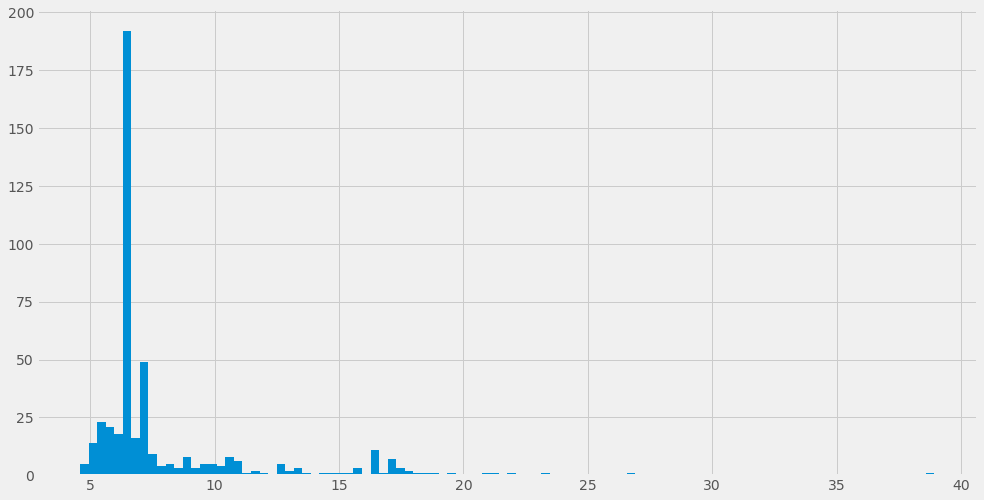

In [22]:
centers = cluster_model.cluster_centers_
points = np.asarray(data_new)
total_distance = pd.Series()

def get_sum_square_distance(data, cluster_model):
    centers = cluster_model.cluster_centers_
    points = np.asarray(data[feature_cols])
    total_distance = pd.Series()
    for i in range(len(points)):
        distance = 0
        for j in range(len(centers)):
            a = np.linalg.norm(points[i] - centers[j])
            distance += a**2
        total_distance.at[i] = distance
    
    return total_distance  

df_grouped['ssd'] = get_sum_square_distance(data_new, cluster_model)


plt.hist(df_grouped['ssd'], bins=100)


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

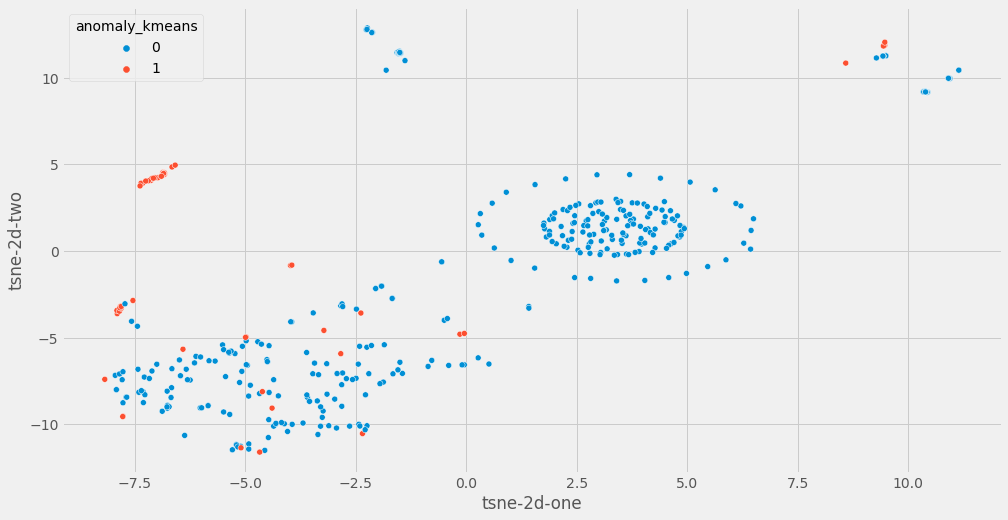

In [24]:
cutoff = 12
df_grouped['anomaly_kmeans'] = (df_grouped['ssd'] >= cutoff).astype(int)

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="anomaly_kmeans",
#     palette=sns.color_palette("hls", 10),
    data=df_grouped,
    legend="full",
    alpha=1
)


In [25]:
df_grouped.loc[df_grouped['anomaly_kmeans']==1]


,Date,total_msgs,WARN_count,INFO_count,DEBUG_count,TRACE_count,ERROR_count,FATAL_count,dc2c74b7_count,5d5de21c_count,...,04137b95_count,d6b7b743_count,98012f03_count,728076ac_count,415a1760_count,cluster,tsne-2d-one,tsne-2d-two,ssd,anomaly_kmeans
4,2008-11-09 21:00:00,8,0,8,0,0,0,0,0,3,...,0,0,0,0,0,5,-7.136110,4.073763,15.821919,1
6,2008-11-09 21:10:00,10,0,10,0,0,0,0,0,2,...,0,0,0,0,0,8,-4.980541,-4.963925,13.332131,1
11,2008-11-09 21:35:00,5,0,5,0,0,0,0,1,0,...,0,0,0,0,0,5,-6.982651,4.226448,16.404396,1
21,2008-11-09 22:25:00,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,11,9.466833,11.859344,17.264285,1
25,2008-11-09 22:45:00,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,11,9.450174,11.858561,17.264285,1
45,2008-11-10 00:25:00,6,0,6,0,0,0,0,3,0,...,0,0,0,0,0,5,-7.117862,4.176582,16.356306,1
55,2008-11-10 01:15:00,9,0,9,0,0,0,0,1,3,...,0,0,0,0,0,5,-7.197436,4.046672,15.349042,1
62,2008-11-10 01:50:00,9,0,9,0,0,0,0,3,2,...,0,0,0,0,0,9,-2.348083,-10.531483,15.626569,1
64,2008-11-10 02:00:00,12,0,12,0,0,0,0,2,3,...,0,0,0,0,0,9,-4.394756,-9.063492,12.948329,1
138,2008-11-10 08:10:00,8,2,6,0,0,0,0,0,0,...,0,0,0,0,0,11,8.590096,10.836511,21.844436,1
